## Desafío - Inferencia e hipótesis - Maria Laura Oyarce

#### En este desafío validaremos nuestros conocimientos de estadística inferencial. Para lograrlo, realizarás inferencias y pruebas de hipótesis a partir de la base de datos earnings.csv. 

1. Considerando las variables earn, height y age, vamos a suponer que nuestro dataset
fuera una población completa. (Prepara los datos adecuadamente). 

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('earnings.csv')
# Exploración inicial de los datos
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height            1816 non-null   int64  
 1   weight            1789 non-null   float64
 2   male              1816 non-null   int64  
 3   earn              1816 non-null   float64
 4   earnk             1816 non-null   float64
 5   ethnicity         1816 non-null   object 
 6   education         1814 non-null   float64
 7   mother_education  1572 non-null   float64
 8   father_education  1521 non-null   float64
 9   walk              1816 non-null   int64  
 10  exercise          1816 non-null   int64  
 11  smokenow          1815 non-null   float64
 12  tense             1815 non-null   float64
 13  angry             1815 non-null   float64
 14  age               1816 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 212.9+ KB


None

,height,weight,male,earn,earnk,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
count,1816.000000,1789.000000,1816.000000,1816.000000,1816.000000,1814.000000,1572.000000,1521.000000,1816.000000,1816.000000,1815.000000,1815.000000,1815.000000,1816.000000
mean,66.568833,156.305198,0.371696,21147.296256,21.147296,13.235391,13.608779,13.652202,5.303414,3.049009,1.745455,1.421488,1.421488,42.934471
std,3.831822,34.617059,0.483391,22531.765123,22.531765,2.556638,3.219372,3.250811,2.601104,2.316385,0.435725,2.157850,2.157850,17.161672
min,57.000000,80.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000
25%,64.000000,130.000000,0.000000,6000.000000,6.000000,12.000000,12.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,29.000000
50%,66.000000,150.000000,0.000000,16000.000000,16.000000,12.000000,13.000000,13.000000,6.000000,2.000000,2.000000,0.000000,0.000000,39.000000
75%,69.250000,180.000000,1.000000,27000.000000,27.000000,15.000000,16.000000,16.000000,8.000000,5.000000,2.000000,2.000000,2.000000,56.000000
max,82.000000,342.000000,1.000000,400000.000000,400.000000,18.000000,99.000000,99.000000,8.000000,7.000000,2.000000,7.000000,7.000000,91.000000


Text(0.5, 1.0, 'Mapa de valores nulos en el data frame')

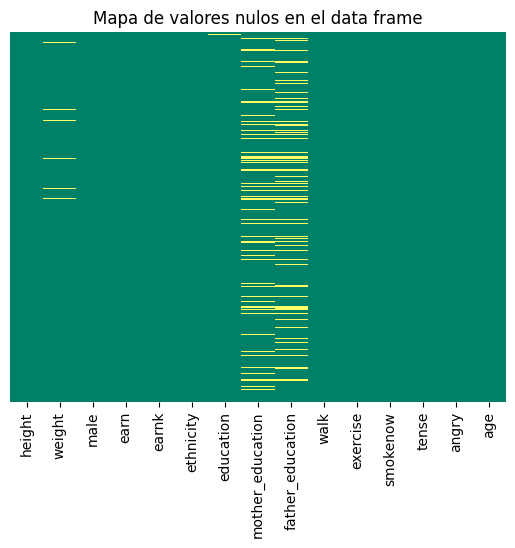

In [3]:
#Creamos un heatmap para visualizar mejor los valores nulos en cada columna
sns.heatmap(data.isnull(), cmap='summer', cbar=False, yticklabels=False)
plt.title('Mapa de valores nulos en el data frame')

Si bien hay algunas columnas que tienen valores nulos, éstas no las utilizaremos por lo que no limpiaré el dataframe. Pero hay que tener en cuenta que siempre es mejor trabajar con un dataframe 100% limpio.

Text(0.5, 1.0, 'Visualización de outliers en columnas de interés')

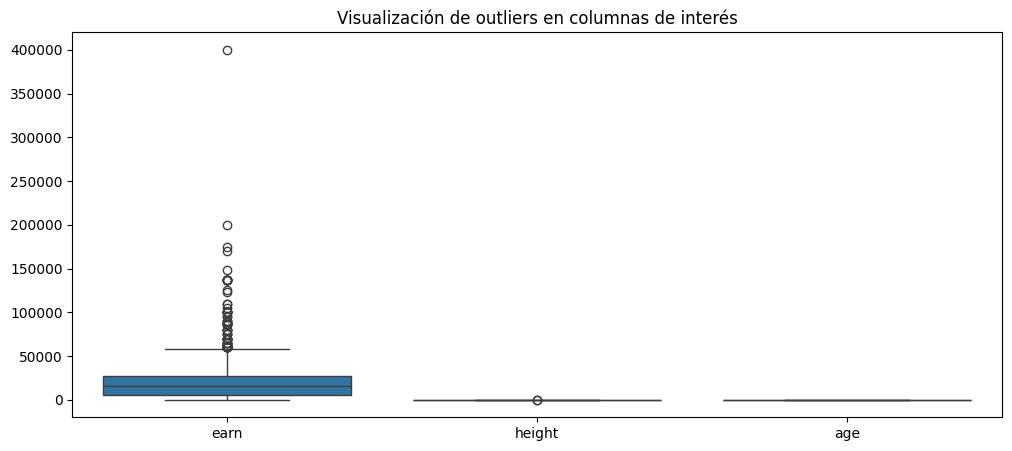

In [4]:
#Creamos un boxplot para visualizar outliers en las columnas con las que trabajaremos
plt.figure(figsize=(12, 5))
sns.boxplot(data=data[['earn', 'height', 'age']])
plt.title('Visualización de outliers en columnas de interés')

En el caso de la columna earn, existen outliers (y uno con un valor muy extremo). Quiero ver como afectarían estos outliers al desarrollo de la tarea por lo que trabajaré con dos dataframes nuevos: uno sin outliers y el otro con outliers.

In [5]:
#Función para remover outliers basada en el criterio del rango intercuartílico
def remover_outliers(df, columna):
    Q1=df[columna].quantile(0.25)
    Q3=df[columna].quantile(0.75)
    IQR=Q3-Q1
    filtro=(df[columna]>=(Q1-1.5*IQR))&(df[columna]<=(Q3+1.5*IQR))
    return df[filtro]

#Nuevo dataset sin outliers
data_wo_out=data.copy()
for col in ['earn','height','age']:
    data_wo_out=remover_outliers(data_wo_out, col)

In [6]:
data_wo_out.describe()

,height,weight,male,earn,earnk,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
count,1716.000000,1689.000000,1716.000000,1716.000000,1716.000000,1714.000000,1481.000000,1431.000000,1716.000000,1716.000000,1715.000000,1715.000000,1715.000000,1716.000000
mean,66.387529,155.241563,0.349650,17436.182984,17.436183,13.120770,13.501013,13.542278,5.290793,3.029720,1.741691,1.449563,1.449563,42.606643
std,3.745341,34.326556,0.476999,13084.561029,13.084561,2.517191,3.239771,3.275165,2.604537,2.313792,0.437832,2.178229,2.178229,17.273608
min,57.000000,80.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000
25%,64.000000,130.000000,0.000000,5093.000000,5.093000,12.000000,12.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,29.000000
50%,66.000000,150.000000,0.000000,15000.000000,15.000000,12.000000,13.000000,13.000000,6.000000,2.000000,2.000000,0.000000,0.000000,39.000000
75%,69.000000,175.000000,1.000000,25000.000000,25.000000,15.000000,16.000000,16.000000,8.000000,5.000000,2.000000,2.000000,2.000000,55.250000
max,76.000000,342.000000,1.000000,58000.000000,58.000000,18.000000,99.000000,99.000000,8.000000,7.000000,2.000000,7.000000,7.000000,91.000000


In [7]:
data.describe()

,height,weight,male,earn,earnk,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
count,1816.000000,1789.000000,1816.000000,1816.000000,1816.000000,1814.000000,1572.000000,1521.000000,1816.000000,1816.000000,1815.000000,1815.000000,1815.000000,1816.000000
mean,66.568833,156.305198,0.371696,21147.296256,21.147296,13.235391,13.608779,13.652202,5.303414,3.049009,1.745455,1.421488,1.421488,42.934471
std,3.831822,34.617059,0.483391,22531.765123,22.531765,2.556638,3.219372,3.250811,2.601104,2.316385,0.435725,2.157850,2.157850,17.161672
min,57.000000,80.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000
25%,64.000000,130.000000,0.000000,6000.000000,6.000000,12.000000,12.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,29.000000
50%,66.000000,150.000000,0.000000,16000.000000,16.000000,12.000000,13.000000,13.000000,6.000000,2.000000,2.000000,0.000000,0.000000,39.000000
75%,69.250000,180.000000,1.000000,27000.000000,27.000000,15.000000,16.000000,16.000000,8.000000,5.000000,2.000000,2.000000,2.000000,56.000000
max,82.000000,342.000000,1.000000,400000.000000,400.000000,18.000000,99.000000,99.000000,8.000000,7.000000,2.000000,7.000000,7.000000,91.000000


a. Realiza 12 pruebas (4 por cada variable) con muestras de tamaño n = 25, en cada caso, con niveles de significancia diferentes pero inferiores a 0,1, para confirmar o rechazar las siguientes hipótesis considerando las alternativas.
Crea para ello una fórmula que reciba los parámetros adecuados y responda "con nivel de confianza del ...%, se acepta la hipótesis nula/alternativa".

<img src='tabla_desafio5.png'>

In [8]:
#Definimos la función para realizar pruebas de hipótesis
def prueba_hipotesis(datos, mu, alpha, tipo_prueba='dos_colas'):
    """
    Realiza una prueba de hipótesis de media para una muestra dada.
    
    Parámetros:
    -datos: Muestra de datos sobre la que se realiza la prueba.
    -mu: Valor de la media poblacional bajo la hipótesis nula (H0).
    -alpha: Nivel de significancia.
    -tipo_prueba: 'dos_colas', 'cola_derecha', 'cola_izquierda'
    """
    #Seleccionamos 25 valores aleatorios de datos
    muestra=np.random.choice(datos, size=25, replace=False)
    #Realizamos la prueba t de la muestra
    t_stat, p_value=stats.ttest_1samp(muestra, mu)

    #Aqui decidimos si se rechaza H0 o no
    if tipo_prueba=='dos_colas':
        t_stat, p_value=stats.ttest_1samp(muestra, mu,alternative='two-sided')
    elif tipo_prueba=='cola_derecha':
        t_stat, p_value=stats.ttest_1samp(muestra, mu,alternative='greater')
    else:  #cola izquierda
        t_stat, p_value=stats.ttest_1samp(muestra, mu,alternative='less')
    decision=p_value < alpha #Estas operaciones me entregan valores booleanos True o False

    #Finalmente generamos la conclusión
    conclusion='se acepta la hipótesis alternativa' if decision else 'se acepta la hipótesis nula'
    #Calculamos el nivel de confianza
    nivel_confianza=(1 - alpha) * 100
    return p_value,alpha,'Con nivel de confianza del '+str(nivel_confianza)+'%, '+str(conclusion)

In [9]:
#Definimos las listas con los valores que queremos recorrer
variables=['earn','height','age']
values=[[20000,35000,25000,32000],[55,68,63,70],[44,56,51,62]]
tests=['dos_colas','dos_colas','cola_derecha','cola_izquierda']
levels=[0.05,0.1,0.03,0.07]
p1,p2=[],[]
a1,a2=[],[]
results_outliers=[]
results_wo_outliers=[]

#Recorremos las listas 
for i in range(len(variables)):
    for j in range(len(values[i])):
        #Hacemos la prueba de hipótesis con la función creada anteriormente
        #Dataset con outliers
        prueba1=prueba_hipotesis(data[variables[i]],values[i][j],levels[j],tests[j])
        results_outliers.append(prueba1[2])
        p1.append(prueba1[0])
        a1.append(prueba1[1])
        #Dataset sin outliers
        prueba2=prueba_hipotesis(data_wo_out[variables[i]],values[i][j],levels[j],tests[j])
        results_wo_outliers.append(prueba2[2])
        p2.append(prueba2[0])
        a2.append(prueba2[1])

In [10]:
for i in range(len(results_outliers)):
    print (p1[i],a1[i])
    print (results_outliers[i],'--> con outliers')
    print (results_wo_outliers[i],'--> sin outliers')
    print ('')

0.12839386831658778 0.05
Con nivel de confianza del 95.0%, se acepta la hipótesis nula --> con outliers
Con nivel de confianza del 95.0%, se acepta la hipótesis nula --> sin outliers

3.126677573406095e-07 0.1
Con nivel de confianza del 90.0%, se acepta la hipótesis alternativa --> con outliers
Con nivel de confianza del 90.0%, se acepta la hipótesis alternativa --> sin outliers

0.9558718447091412 0.03
Con nivel de confianza del 97.0%, se acepta la hipótesis nula --> con outliers
Con nivel de confianza del 97.0%, se acepta la hipótesis nula --> sin outliers

0.006001457342104705 0.07
Con nivel de confianza del 93.0%, se acepta la hipótesis alternativa --> con outliers
Con nivel de confianza del 93.0%, se acepta la hipótesis alternativa --> sin outliers

1.80300970111781e-13 0.05
Con nivel de confianza del 95.0%, se acepta la hipótesis alternativa --> con outliers
Con nivel de confianza del 95.0%, se acepta la hipótesis alternativa --> sin outliers

0.8850436896360079 0.1
Con nivel de 

Como podemos apreciar, en solo 1 caso los resultados son distintos si se consideran outliers o no. Pero creo que para efectos prácticos de este desafío no hay que eliminar los outliers de la muestra de datos.

b. Calcula la media poblacional para cada variable. ¿Son correctos los resultados obtenidos por tus pruebas?

In [54]:
for col in ['earn','height','age']:
    print ('Media poblacional de '+str(col)+': ',data[col].mean(),'+-',str(data[col].std()),'--> con outliers')
    print ('Media poblacional de '+str(col)+': ',data_wo_out[col].mean(),'+-',str(data_wo_out[col].std()),'--> sin outliers')
    print ('')

Media poblacional de earn:  21147.296255506608 +- 22531.76512330289 --> con outliers
Media poblacional de earn:  17436.182983682982 +- 13084.561028776188 --> sin outliers

Media poblacional de height:  66.56883259911895 +- 3.8318223821904533 --> con outliers
Media poblacional de height:  66.38752913752914 +- 3.745340594035644 --> sin outliers

Media poblacional de age:  42.934471365638764 +- 17.16167172391752 --> con outliers
Media poblacional de age:  42.60664335664335 +- 17.273608246278748 --> sin outliers



<img src='tabla_resultados_desafio5.png'>

En la tabla de arriba podemos ver en verde las pruebas que obtuvieron resultados correctos y en rojo las pruebas que obtuvieron resultados erroneos. Solo una prueba tuvo error, y puede deberse a diferentes motivos. Uno de ellos puede ser que al extraer la muestra de 25 datos de forma random, la muestra de sin outliers sacó valores similares entre ellos, pero bastante diferentes a la media (por ejemplo, sacar 25 valores mayores a 72). Por otro lado, con un nivel de significancia de 0.1 la prueba tiene un margen de error mayor, lo que puede facilitar rechazar H0 (o aprobar H1) si esque la diferencia es significativa.

2. Crea una función que estime la proporción de hombres en el dataset, considerando una muestra de 50 individuos, con niveles de significancia de 0,05 y 0,01. Escribe con palabras tus resultados ejecutar la función e interpreta. Compara con la proporción real.

In [44]:
def estimar_proporcion_hombres(datos, size, alpha):
    """
    Estima la proporción de hombres en una muestra de tamaño definido.
    Calcula intervalos de confianza para los niveles de significancia dados.

    Parámetros:
    -datos: Dataset de donde se extraerá la muestra.
    -size: Tamaño de la muestra.
    """
    #Extraemos la muestra aleatoriamente
    muestra=np.random.choice(datos, size, replace=False)
    #Calculamos el promedio de la muestra
    prop_muestra=np.mean(muestra)
    
    resultados=[]
    #Recorremos los valores del nivel de confianza
    for alfa in alpha:
        #Valor crítico de la distribución normal
        z=stats.norm.ppf(1 - alfa/2)
        #Calculamos los márgenes del intervalo de confianza
        margen_error=z*np.sqrt((prop_muestra*(1-prop_muestra))/size)
        intervalo=(prop_muestra-margen_error,prop_muestra+margen_error)
        resultados.append('Intervalo de confianza al '+str(100*(1-alfa))+'%: '+str(intervalo))
    return prop_muestra, resultados

In [45]:
alpha=[0.05,0.01]
a=estimar_proporcion_hombres(data['male'],50,alpha)
print ('Proporción de hombres en la muestra',a[0])
print (a[1][0])
print (a[1][1])
print ('Proporción real de hombres en el dataset',np.mean(data['male']))

Proporción de hombres en la muestra 0.36
Intervalo de confianza al 95.0%: (0.22695323286243094, 0.493046767137569)
Intervalo de confianza al 99.0%: (0.18514690869902886, 0.5348530913009711)
Proporción real de hombres en el dataset 0.3716960352422907


La proporción estimada en la muestra es muy cercana a la proporcion real, por lo que la muestra tomada de 50 individuos es representativa de la poblacion total.

Por otro lado, ambos intervalos de confianza contienen la proporción real, por lo que podemos decir que con un 95% o 99% de confianza, la proporción real de hombres está dentro del rango (0.23,0.49) o (0.19,0.53), respectivamente.

3. Considerando el dataset como una muestra, verifica si el género (male=1 significa ‘hombre”) influye sobre el sueldo “earn” de las personas. Explica y justifica tu procedimiento.

In [47]:
#Extraemos los datos
hombres=data[data['male']==1]['earn']
mujeres=data[data['male']==0]['earn']

#Hacemos la prueba de hipotesis para comparar medias, osea el t test de dos muestras
t_test,p_value=stats.ttest_ind(hombres,mujeres,equal_var=False)

#Calculamos el promedio real de los ingresos de las poblaciones
mean_hombres=np.mean(hombres)
mean_mujeres=np.mean(mujeres)

print ('Media de ingresos hombres: ',mean_hombres)
print ('Media de ingresos mujeres: ',mean_mujeres)
print ('valor p de la prueba de hipótesis',p_value)

Media de ingresos hombres:  30105.17925925926
Media de ingresos mujeres:  15847.935144609992
valor p de la prueba de hipótesis 2.7373648004575493e-30


Utilizando un nivel de confianza del 95% ($\alpha$=0.05) podemos rechazar la hipótesis nula por lo que se concluye que el género influye significativamente en los ingresos de la persona.

Text(0, 0.5, 'Ingresos')

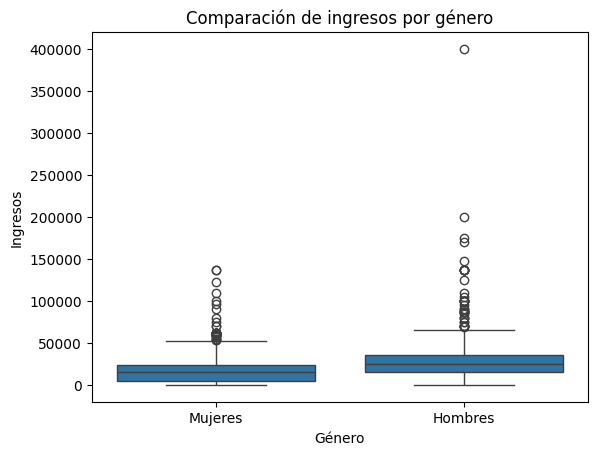

In [50]:
#Finalmente hacemos un boxplot para visualizar las diferencias

sns.boxplot(x=data['male'],y=data['earn'])
plt.xticks([0,1],['Mujeres','Hombres'])
plt.title('Comparación de ingresos por género')
plt.xlabel('Género')
plt.ylabel('Ingresos')

Realizaré el mismo procedimiento pero con los datos sin outliers:

In [52]:
#Extraemos los datos
hombres=data_wo_out[data_wo_out['male']==1]['earn']
mujeres=data_wo_out[data_wo_out['male']==0]['earn']

#Hacemos la prueba de hipotesis para comparar medias, osea el t test de dos muestras
t_test,p_value=stats.ttest_ind(hombres,mujeres,equal_var=False)

#Calculamos el promedio real de los ingresos de las poblaciones
mean_hombres=np.mean(hombres)
mean_mujeres=np.mean(mujeres)

print ('Media de ingresos hombres: ',mean_hombres)
print ('Media de ingresos mujeres: ',mean_mujeres)
print ('valor p de la prueba de hipótesis',p_value)

Media de ingresos hombres:  22968.326666666668
Media de ingresos mujeres:  14461.912186379928
valor p de la prueba de hipótesis 8.219244907082697e-37


Text(0, 0.5, 'Ingresos')

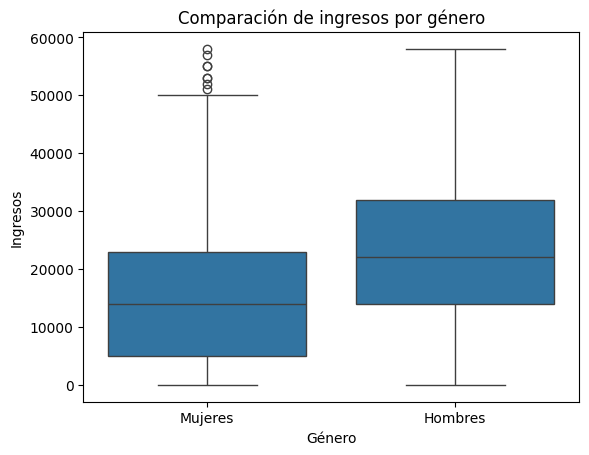

In [53]:
sns.boxplot(x=data_wo_out['male'],y=data_wo_out['earn'])
plt.xticks([0,1],['Mujeres','Hombres'])
plt.title('Comparación de ingresos por género')
plt.xlabel('Género')
plt.ylabel('Ingresos')

Utilizando el mismo nivel de confianza del 95% llegamos a la misma conclusión de que rechazamos la hipótesis nula y concluimos que el género si inlfuye en los ingresos de la persona. En este caso, no hay diferencia de los resultados utilizando una muestra con valores extremos y una muestra sin valores atípicos.